# 1. Data Preparation
Importing the data file, and preparing it to the analysis.

In [145]:
import pandas as pd

In [146]:
df = pd.read_excel('..\\Datasets\\Online_Retail.xlsx')

In [147]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [148]:
# Data Cleaning
df['CustomerID'] = df['CustomerID'].ffill() 
df.drop('Description', axis=1, inplace=True)
df.dropna(subset=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country'], inplace=True)

df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [149]:
df.shape

(541909, 7)

In [150]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country'],
      dtype='object')

---
# 2. Feature Engineering
We extract relevant features reflecting customer behavior, such as purchase history and total spending. Additional metrics like recency of purchase are calculated to capture behavior accurately.

In [151]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Feature Aggregation
df_customer = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',    # Order frequency
    'TotalAmount': 'sum',      # Total spending
}).reset_index()

# Rename columns for clarity
df_customer.columns = ['CustomerID', 'OrderFrequency', 'TotalSpending']

df_customer

,CustomerID,OrderFrequency,TotalSpending
0,12346.0,2,0.00
1,12347.0,7,4310.00
2,12348.0,5,3366.27
3,12349.0,1,1757.55
4,12350.0,1,334.40
...,...,...,...
4367,18280.0,6,8330.57
4368,18281.0,1,80.82
4369,18282.0,3,176.60
4370,18283.0,16,2094.88


---
# 3. Dimensionality Reduction with PCA
PCA is applied to reduce the dimensionality of the feature space.

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [153]:
features = ['OrderFrequency', 'TotalSpending']
x = df_customer[features]
x_scl = StandardScaler().fit_transform(x)

pca = PCA()
pca_comp = pca.fit_transform(x_scl)
df_pca = pd.DataFrame(data=pca_comp, columns=pca.get_feature_names_out())

pca.explained_variance_ratio_

array([0.79857198, 0.20142802])

In [154]:
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(x_scl)
df_pca = pd.DataFrame(data=pca_comp, columns=pca.get_feature_names_out())

df_final = pd.concat([df_pca, df_customer[['CustomerID']]], axis=1)

df_final

,pca0,pca1,CustomerID
0,-0.430979,0.075139,12346.0
1,0.235402,0.096630,12347.0
2,0.031115,0.150299,12348.0
3,-0.355217,0.279880,12349.0
4,-0.468783,0.166314,12350.0
...,...,...,...
4367,0.491753,0.481958,18280.0
4368,-0.489019,0.146078,18281.0
4369,-0.352397,0.024743,18282.0
4370,0.639039,-0.660538,18283.0


---
# 4. Determining Optimal Number of Clusters:
We use the Elbow method to find the optimal number of clusters for K-means clustering.

In [155]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

interia 1: 8743.999999999996
interia 2: 4880.055396675581
interia 3: 3340.29940218693
interia 4: 2369.3775136528857
interia 5: 1682.5104238604677
interia 6: 1391.5913030035176
interia 7: 1182.607676590145
interia 8: 1140.6079833134963
interia 9: 873.1075677410319
interia 10: 681.244367243977
interia 11: 621.2050865630101
interia 12: 565.3360893027296
interia 13: 501.4999213769585
interia 14: 468.6361153585793
interia 15: 409.13285229016174
interia 16: 377.9670469460565
interia 17: 345.8217571663087
interia 18: 311.5991967443428
interia 19: 282.7390770110857


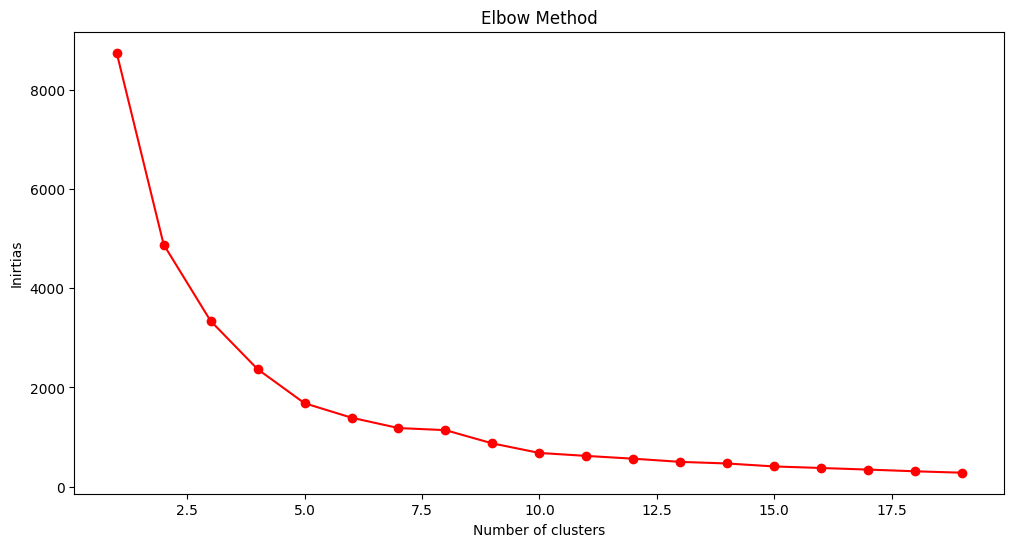

In [156]:
list_of_inirtias = []
for k in range(1, 20):
    km = KMeans(n_clusters=k, random_state=29)
    km.fit(df_pca)
    list_of_inirtias.append(km.inertia_)
    print('interia ' + str(k) + ': ' + str(km.inertia_))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), list_of_inirtias, 'r-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inirtias')
plt.show()

## 3 seems to be the best k-value

---
# 5. K-means Clustering

With dimensionality reduced, K-means clustering is performed to assign each customer to a cluster based on their feature values.

In [157]:
km = KMeans(n_clusters=3, random_state=29)
km.fit(df_pca)
predictions = km.fit_predict(df_pca)

df_final['Cluster'] = predictions

df_final

,pca0,pca1,CustomerID,Cluster
0,-0.430979,0.075139,12346.0,0
1,0.235402,0.096630,12347.0,0
2,0.031115,0.150299,12348.0,0
3,-0.355217,0.279880,12349.0,0
4,-0.468783,0.166314,12350.0,0
...,...,...,...,...
4367,0.491753,0.481958,18280.0,0
4368,-0.489019,0.146078,18281.0,0
4369,-0.352397,0.024743,18282.0,0
4370,0.639039,-0.660538,18283.0,0


---
# 6. Cluster Profiling:

Each cluster is profiled to get a better sense of what each cluster represents.

In [158]:
df_cluster = pd.merge(df_customer, df_final[['CustomerID', 'Cluster']], on='CustomerID')

prof_cluster = df_cluster.groupby('Cluster').agg({
    'OrderFrequency': 'mean',
    'TotalSpending': 'mean',
}).reset_index()

prof_cluster

,Cluster,OrderFrequency,TotalSpending
0,0,4.600614,1401.239843
1,1,103.666667,190043.695000
2,2,43.931818,20262.395985


---
# 7. Visualization:

Using a scatter plot, we visualize the data to see how the cluster are represented on a plot.

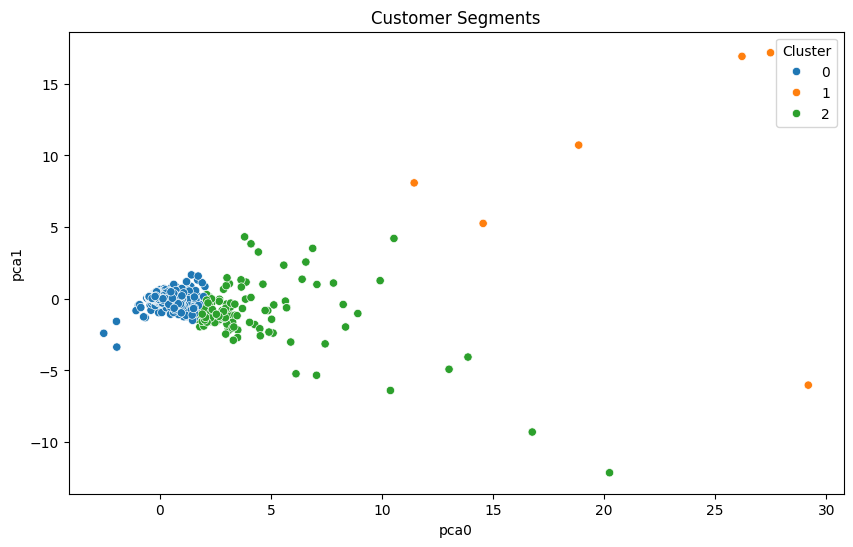

In [159]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final, x='pca0', y='pca1', hue='Cluster', palette='tab10')
plt.title('Customer Segments')
plt.show()

---
# 8. Evaluation:

Clustering quality is determined using appropriate silhouette score and within-cluster sum of squares.

In [160]:
from sklearn.metrics import silhouette_score

In [161]:
sil_score = silhouette_score(df_pca, df_final['Cluster'])
print(f'Silhouette Score: {sil_score}')

distances = km.transform(df_pca)
squared_distances = distances**2
wcss = squared_distances.sum(axis=1)
total_wcss = wcss.sum()

print("Total within-cluster sum of squares (WCSS):", total_wcss)

Silhouette Score: 0.8578399344727586
Total within-cluster sum of squares (WCSS): 2408503.7575059454


---
## Extra: Remapping Clusters into proper named categories

We remap the clusters into a new column called 'Buyer type' to properly categorize the clusters instead of leaving them at 0, 1, 2.

In [162]:
cluster_mapping = {
    0: 'Low, Infrequent',
    1: 'High, Frequent',
    2: 'Moderate'
}

df_cluster['BuyerType'] = df_cluster['Cluster'].map(cluster_mapping)


# Move the BuyerType column to the second column
cols_cluster = [df_cluster.columns[0]] + ['BuyerType'] + [col for col in df_cluster.columns if col not in [df_cluster.columns[0], 'BuyerType']]
df_cluster = df_cluster[cols_cluster]

# Remove the old Cluster column
df_cluster.drop('Cluster', axis=1, inplace=True)

df_cluster

,CustomerID,BuyerType,OrderFrequency,TotalSpending
0,12346.0,"Low, Infrequent",2,0.00
1,12347.0,"Low, Infrequent",7,4310.00
2,12348.0,"Low, Infrequent",5,3366.27
3,12349.0,"Low, Infrequent",1,1757.55
4,12350.0,"Low, Infrequent",1,334.40
...,...,...,...,...
4367,18280.0,"Low, Infrequent",6,8330.57
4368,18281.0,"Low, Infrequent",1,80.82
4369,18282.0,"Low, Infrequent",3,176.60
4370,18283.0,"Low, Infrequent",16,2094.88


In [163]:
df_cluster.query("BuyerType == 'Moderate' or BuyerType == 'High, Frequent'")


,CustomerID,BuyerType,OrderFrequency,TotalSpending
55,12415.0,"High, Frequent",32,124594.39
100,12471.0,Moderate,56,24755.97
103,12474.0,Moderate,38,8492.20
179,12569.0,Moderate,38,9096.85
226,12621.0,Moderate,26,15357.62
...,...,...,...,...
4245,18118.0,Moderate,33,5595.77
4285,18172.0,Moderate,32,6903.09
4324,18223.0,Moderate,29,7436.61
4326,18225.0,Moderate,34,11371.99


---

## 9. Personalization and Recommendations

Tailor personalized marketing strategies and recommendations for each Buyer Type.

In [164]:
# Add a MarketingStrategy to each type of buyer.
def marketing_strategy(cluster):
    if cluster == 'High, Frequent':
        return 'Loyalty programs, Execlusive deals'
    elif cluster == 'Moderate':
        return 'Loyalty programs, Seasonal Promotions'
    elif cluster == 'Low, Infrequent':
        return 'Bundles, Seasonal Promotions'

df_cluster['MarketingStrategy'] = df_cluster['BuyerType'].apply(marketing_strategy)

df_cluster

,CustomerID,BuyerType,OrderFrequency,TotalSpending,MarketingStrategy
0,12346.0,"Low, Infrequent",2,0.00,"Bundles, Seasonal Promotions"
1,12347.0,"Low, Infrequent",7,4310.00,"Bundles, Seasonal Promotions"
2,12348.0,"Low, Infrequent",5,3366.27,"Bundles, Seasonal Promotions"
3,12349.0,"Low, Infrequent",1,1757.55,"Bundles, Seasonal Promotions"
4,12350.0,"Low, Infrequent",1,334.40,"Bundles, Seasonal Promotions"
...,...,...,...,...,...
4367,18280.0,"Low, Infrequent",6,8330.57,"Bundles, Seasonal Promotions"
4368,18281.0,"Low, Infrequent",1,80.82,"Bundles, Seasonal Promotions"
4369,18282.0,"Low, Infrequent",3,176.60,"Bundles, Seasonal Promotions"
4370,18283.0,"Low, Infrequent",16,2094.88,"Bundles, Seasonal Promotions"


---

## 10. Interpretation and Insights

### High-Value Customer Engagement

The segmentation analysis revealed distinct customer groups based on purchasing behavior. High-frequency, high-value customers contribute significantly to revenue and should be engaged with loyalty programs and exclusive offers to maintain their interest.

### Addressing Low-Value Customers

Infrequent, low-value customers are at risk of churning. They can be motivated with special discounts and personalized recommendations to boost their purchase frequency and value.

### Optimizing Marketing and Inventory

Understanding these segments cab help in targeted marketing, improved customer retention strategies, and optimized inventory management. This approach ensures popular products are well-stocked while reducing overstock of less popular items, ultimately enhancing customer satisfaction and profitability.